In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
df = pd.read_excel("RelatorioQualidadeAguasSuperficiais.xlsx")

In [ ]:
t_agua = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
o_agua = [14.6, 14.2, 13.8, 13.5, 13.1, 12.8, 12.5, 12.2, 11.9, 11.6, 11.3, 11.1, 10.9, 10.6, 10.4, 10.2, 10.0, 9.8, 9.6, 9.4, 9.2, 9.0, 8.9, 8.7, 8.6, 8.4, 8.2, 8.1, 7.9, 7.8, 7.7]

In [59]:
indicators = {}
indicators["Coliformes"] = pd.read_csv('csv_iqa\COLIFORMESCSV.csv', delimiter=';', decimal=',', header=None)
indicators["pH"] = pd.read_csv('csv_iqa/PHCSV.csv', delimiter=';', decimal=',', header=None)
indicators["DBO"] = pd.read_csv('csv_iqa\DEMANDACSV.csv', delimiter=';', decimal=',', header=None)
indicators["Nitrogenio"] = pd.read_csv('csv_iqa/NITROGENIOCSV.csv', delimiter=';', decimal=',', header=None)
indicators["Fosforo"] = pd.read_csv('csv_iqa/fosforo.csv', delimiter=',', decimal='.', header=None)
indicators["Temperatura"] = pd.read_csv('csv_iqa/temperatura.csv', delimiter=',', decimal='.', header=None)
indicators["Turbidez"] = pd.read_csv('csv_iqa/turbidez.csv', delimiter=',', decimal='.', header=None)
indicators["Residuos"] = pd.read_csv('csv_iqa/residuo.csv', delimiter=',', decimal='.', header=None)
indicators["OD"] = pd.read_csv('csv_iqa/o2dissolvido.csv', delimiter=',', decimal='.', header=None)
indicators["Solubilidade"] = pd.DataFrame(list(zip(t_agua, o_agua)), columns=["Temperatura", "Solubilidade"])

In [72]:
indicators["Solubilidade"]

,Temperatura,Solubilidade
0,0,14.6
1,1,14.2
2,2,13.8
3,3,13.5
4,4,13.1
5,5,12.8
6,6,12.5
7,7,12.2
8,8,11.9
9,9,11.6


In [60]:
def create_df(data_entrada, serie):
    new_data = pd.DataFrame()
    new_data[serie] = data_entrada["Valor"]
    new_data = new_data.set_index(pd.to_datetime(data_entrada["Data Coleta"]))
    return(new_data)

peso_dict = {"Coliformes": 0.15,
             "pH" : 0.12,
             "DBO" : 0.10,
             "OD" : 0.17,
             "Temperatura" : 0.10,
             "Nitrogenio" : 0.10,
             "Fosforo" : 0.10,
             "Turbidez" : 0.08,
             "Residuos" : 0.08}

contorno = {"Coliformes": {"baixo": 1, "baixo_valor": 96, "alto": 1e5, "alto_valor": 3},
             "pH" : {"baixo": 2, "baixo_valor": 2, "alto": 12, "alto_valor": 3},
             "DBO" : {"baixo": 0, "baixo_valor": 98, "alto": 30, "alto_valor": 2},
             "OD" : {"baixo": 0, "baixo_valor": 4, "alto": 140, "alto_valor": 47},
             "Temperatura" : {"baixo": -5, "baixo_valor": 1, "alto": 15, "alto_valor": 9},
             "Nitrogenio" : {"baixo": 0, "baixo_valor": 100, "alto": 100, "alto_valor": 1},
             "Fosforo" : {"baixo": 0, "baixo_valor": 99, "alto": 10, "alto_valor": 1},
             "Turbidez" : {"baixo": 0, "baixo_valor": 100, "alto": 100, "alto_valor": 5},
             "Residuos" : {"baixo": 0, "baixo_valor": 80, "alto": 500, "alto_valor": 32}}

def calcula_IQA(data_coleta):
    q = data_.loc[data_coleta]
    IQA = 1
    for parametro in peso_dict.keys():
        if(q[parametro]<=contorno[parametro]["baixo"]):
            t = contorno[parametro]["baixo_valor"]
        elif(q[parametro]>=contorno[parametro]["alto"]):
            t = contorno[parametro]["alto_valor"]
        else:
            t = float(q[parametro])
        IQA *= np.interp(t, indicators[parametro][0], indicators[parametro][1])**peso_dict[parametro]
    return IQA

# def calcula_Q(data):
#     for dia in data.index:
#         for parametro in peso_dict.keys():
#             if(data.loc[dia_coleta][parametro]<=contorno[parametro]["baixo"]):
#                 data.loc[dia_coleta][parametro] = contorno[parametro]["baixo_valor"]
#             elif(data.loc[dia_coleta][parametro]>=contorno[parametro]["alto"]):
#                 data[dia_coleta][parametro] = contorno[parametro]["alto_valor"]
#             else:
#                 data[dia_coleta][parametro] = np.interp(data[dia_coleta][parametro], indicators[parametro][0], indicators[parametro][1])
#     return data

In [61]:
#Escherichia coli** -> Coliformes Termotolerantes
data_coli = df[df["Parametro"]=='Escherichia coli**']
data_coli = create_df(data_coli, "Coliformes")
data_coli["Coliformes"] = data_coli["Coliformes"].str.replace(',', '.').astype(float)
data_coli = data_coli.sort_values(by="Data Coleta")
# print(f"Numero de linhas coli: {data_coli.shape[0]}")

#pH
data_pH = df[df["Parametro"]=='pH']
data_pH = create_df(data_pH, "pH")
data_pH["pH"] = data_pH["pH"].str.replace(',', '.').astype(float)
data_pH = data_pH.sort_values(by="Data Coleta")
# print(f"Numero de linhas pH: {data_pH.shape[0]}")

#DBO (5, 20)
data_DBO = df[df["Parametro"]=='DBO (5, 20)']
data_DBO = create_df(data_DBO, "DBO")
data_DBO["DBO"] = data_DBO["DBO"].str.replace(',', '.').astype(float)
data_DBO = data_DBO.sort_values(by="Data Coleta")
# print(f"Numero de linhas dbo: {data_DBO.shape[0]}")

#Oxigênio Dissolvido
data_OD = df[df["Parametro"]=='Oxigênio Dissolvido']
data_OD = create_df(data_OD, "OD")
data_OD["OD"] = data_OD["OD"].str.replace(',', '.').astype(float)
data_OD = data_OD.sort_values(by="Data Coleta")
# print(f"Numero de linhas od: {data_OD.shape[0]}")

#Temperatura da Água
data_temp = df[df["Parametro"]=='Temperatura da Água']
data_temp = create_df(data_temp, "Temperatura da Agua")
data_temp["Temperatura da Agua"] = data_temp["Temperatura da Agua"].str.replace(',', '.').astype(float)
mean_temp = data_temp["Temperatura da Agua"].mean()
data_temp = data_temp.sort_values(by="Data Coleta")
# print(f"Numero de linhas temp: {data_temp.shape[0]}")

#Temperatura do Ar
data_temp_ar = df[df["Parametro"]=='Temperatura do Ar']
data_temp_ar = create_df(data_temp_ar, "Temperatura do Ar")
data_temp_ar["Temperatura do Ar"] = data_temp_ar["Temperatura do Ar"].str.replace(',', '.').astype(float)
mean_temp_ar = data_temp_ar["Temperatura do Ar"].mean()
data_temp_ar = data_temp_ar.sort_values(by="Data Coleta")
# print(f"Numero de linhas temp: {data_temp.shape[0]}")

#Nitrogênio Total
data_nitro = df[df["Parametro"]=='Nitrogênio Total']
data_nitro = create_df(data_nitro, "Nitrogenio")
data_nitro["Nitrogenio"] = data_nitro["Nitrogenio"].str.replace(',', '.').astype(float)
data_nitro = data_nitro.sort_values(by="Data Coleta")
# print(f"Numero de linhas nitro: {data_nitro.shape[0]}")

#Fósforo Total
data_fosf = df[df["Parametro"]=='Fósforo Total']
data_fosf = create_df(data_fosf, "Fosforo")
data_fosf["Fosforo"] = data_fosf["Fosforo"].str.replace(',', '.').astype(float)
data_fosf = data_fosf.sort_values(by="Data Coleta")
# print(f"Numero de linhas fosf: {data_fosf.shape[0]}")

#Turbidez
data_turb = df[df["Parametro"]=='Turbidez']
data_turb = create_df(data_turb, "Turbidez")
data_turb["Turbidez"] = data_turb["Turbidez"].str.replace(',', '.').astype(float)
data_turb = data_turb.sort_values(by="Data Coleta")
# print(f"Numero de linhas turb: {data_turb.shape[0]}")

#Sólido Dissolvido Total -> Resíduo Total
data_res = df[df["Parametro"]=='Sólido Dissolvido Total']
data_res = create_df(data_res, "Residuos") 
data_res["Residuos"] = data_res["Residuos"].str.replace(',', '.').astype(float)
data_res = data_res.sort_values(by="Data Coleta")
# print(f"Numero de linhas res: {data_res.shape[0]}")

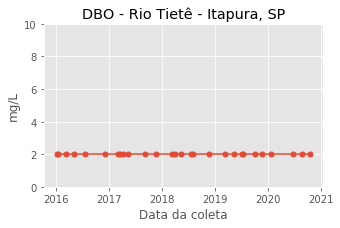

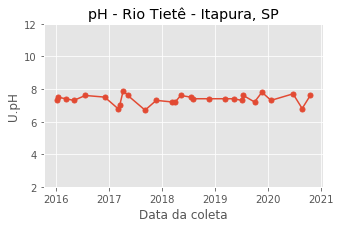

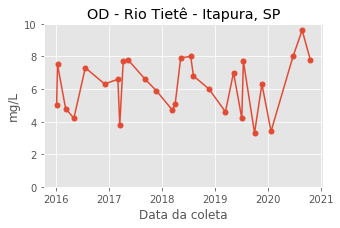

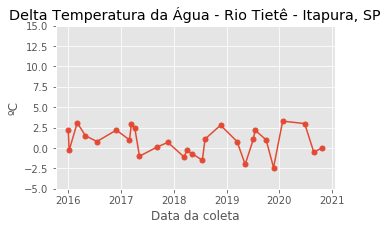

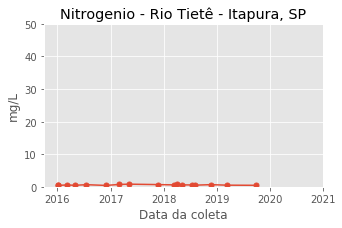

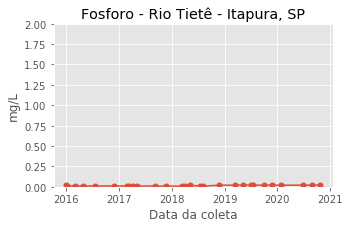

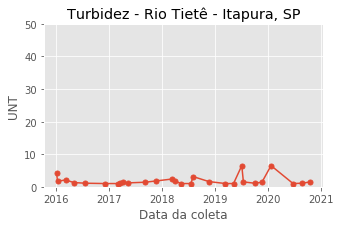

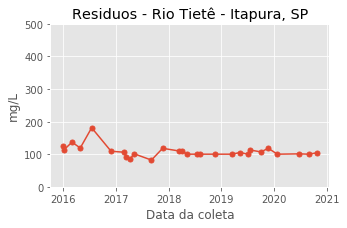

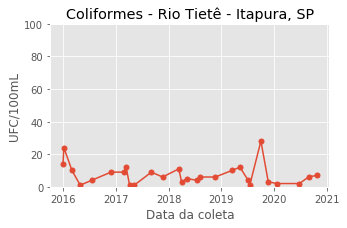

In [63]:
plt.figure(figsize=(6,3))
plt.plot(data_DBO.index, data_DBO['DBO'], '-o', markersize=5)
plt.grid(True)
plt.title("DBO - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("mg/L")
plt.ylim(0, 10)
plt.savefig("dbo.png", dpi=3000)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(data_pH.index, data_pH['pH'], '-o', markersize=5)
plt.grid(True)
plt.title("pH - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("U.pH")
plt.ylim(2,12)
plt.savefig("ph.png", dpi=3000)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(data_OD.index, data_OD['OD'], '-o', markersize=5)
plt.grid(True)
plt.title("OD - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("mg/L")
plt.ylim(0, 10)
plt.savefig("od.png", dpi=3000)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(data_temp.index, data_temp['Temperatura da Agua']-data_temp_ar['Temperatura do Ar'] , '-o', markersize=5)
plt.grid(True)
plt.title("Delta Temperatura da Água - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("ºC")
plt.ylim(-5, 15)
plt.savefig("temp.png", dpi=3000)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(data_nitro.index, data_nitro['Nitrogenio'], '-o', markersize=5)
plt.grid(True)
plt.title("Nitrogenio - Rio Tietê - Itapura, SP")
plt.xlim((pd.to_datetime("2015-10-01"), pd.to_datetime("2021-01-01")))
plt.xlabel("Data da coleta")
plt.ylabel("mg/L")
plt.ylim(0, 50)
plt.savefig("nit.png", dpi=3000)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(data_fosf.index, data_fosf['Fosforo'], '-o', markersize=5)
plt.grid(True)
plt.title("Fosforo - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("mg/L")
plt.ylim(0, 2)
plt.savefig("fosf.png", dpi=3000)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(data_turb.index, data_turb['Turbidez'], '-o', markersize=5)
plt.grid(True)
plt.title("Turbidez - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("UNT")
plt.ylim(0,50)
plt.savefig("turb.png", dpi=3000)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(data_res.index, data_res['Residuos'], '-o', markersize=5)
plt.grid(True)
plt.title("Residuos - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("mg/L")
plt.ylim(0, 500)
plt.savefig("res.png", dpi=3000)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(data_coli.index, data_coli['Coliformes'], '-o', markersize=5)
plt.grid(True)
plt.title("Coliformes - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("UFC/100mL")
plt.ylim(0, 100)
plt.savefig("col.png", dpi=3000)
plt.show()

In [53]:
new_data_temp = pd.merge(data_temp, data_temp_ar, on='Data Coleta')
new_data_temp = pd.merge(new_data_temp, data_OD, on="Data Coleta")
new_data_temp["Temperatura"] = new_data_temp["Temperatura da Agua"] - new_data_temp["Temperatura do Ar"]
new_data_temp["OD"] = 100 * new_data_temp["OD"] / np.interp(new_data_temp["Temperatura da Agua"], indicators["Solubilidade"]["Temperatura"], indicators["Solubilidade"]["Solubilidade"])

In [78]:
data_ = pd.DataFrame()
data_ = pd.merge(data_DBO, data_nitro, on='Data Coleta')
data_ = pd.merge(data_, data_coli, on='Data Coleta')
data_ = pd.merge(data_, data_pH, on='Data Coleta')
data_ = pd.merge(data_, new_data_temp["OD"], on='Data Coleta')
# data_ = pd.merge(data_, data_OD, on='Data Coleta')
data_ = pd.merge(data_, new_data_temp["Temperatura"], on='Data Coleta')
# data_ = pd.merge(data_, new_data_temp["Temperatura da Agua"], on='Data Coleta')
data_ = pd.merge(data_, data_fosf, on='Data Coleta')
data_ = pd.merge(data_, data_turb, on='Data Coleta')
data_ = pd.merge(data_, data_res, on='Data Coleta')
data_ = data_.sort_values(by="Data Coleta")
data_

,DBO,Nitrogenio,Coliformes,pH,OD,Temperatura,Fosforo,Turbidez,Residuos
Data Coleta,,,,,,,,,
2016-01-03,2.0,0.61,14.0,7.3,62.034739,2.2,0.016,4.1,125.0
2016-01-09,2.0,0.43,24.0,7.5,84.650113,-0.3,0.011,1.7,113.0
2016-03-05,2.0,0.57,10.0,7.4,57.279236,3.1,0.013,2.1,137.0
2016-05-01,2.0,0.46,1.0,7.3,52.763819,1.5,0.010,1.3,119.0
2016-07-19,2.0,0.65,4.0,7.6,80.752212,0.8,0.011,1.1,181.0
2016-11-30,2.0,0.42,9.0,7.5,75.539568,2.2,0.010,1.0,109.0
2017-03-01,2.0,0.72,9.0,6.8,81.481481,1.0,0.011,1.0,106.0
2017-05-09,2.0,0.81,1.0,7.6,89.041096,-1.0,0.010,1.2,101.0
2017-11-21,2.0,0.68,6.0,7.3,71.256039,0.7,0.010,1.8,118.0


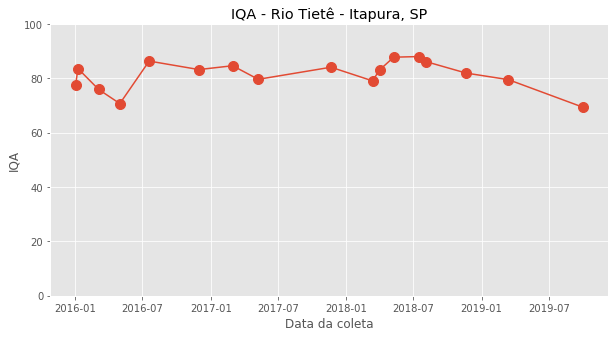

In [70]:
IQA_list = []
for data_coleta in data_.index:
    IQA_list.append(calcula_IQA(data_coleta))

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.ylim(0,100)
plt.plot(data_.index, IQA_list, '-o', markersize=10)
plt.grid(True)
plt.title("IQA - Rio Tietê - Itapura, SP")
plt.xlabel("Data da coleta")
plt.ylabel("IQA")
plt.savefig("IQA", dpi=2000)
plt.show()

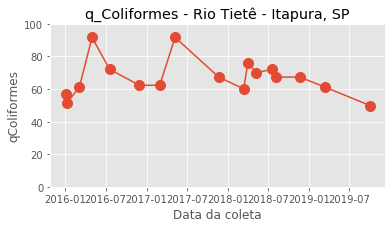

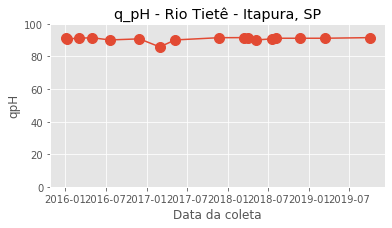

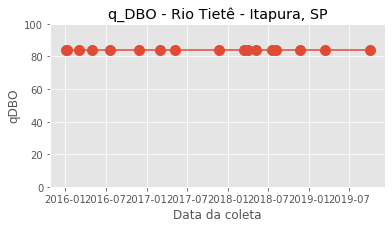

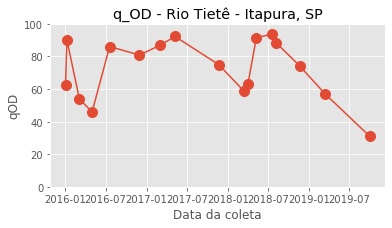

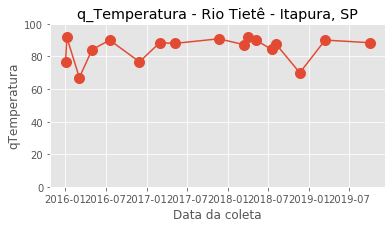

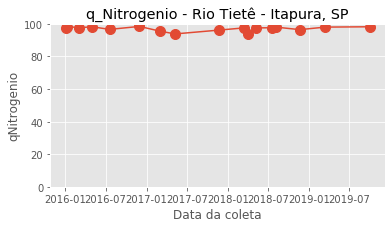

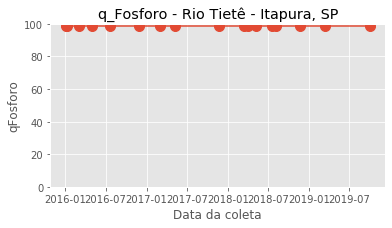

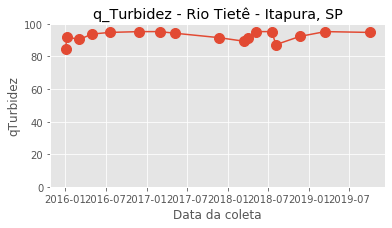

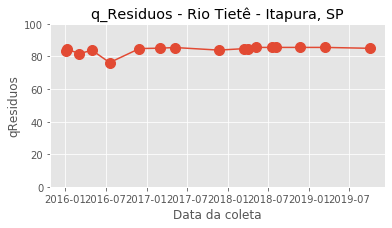

In [71]:
for parametro in peso_dict.keys():
    plt.style.use('ggplot')
    plt.figure(figsize=(6,3))
    plt.plot(data_.index, np.interp(data_[parametro], indicators[parametro][0], indicators[parametro][1]), '-o', markersize=10)
    plt.grid(True)
    plt.title(f"q_{parametro} - Rio Tietê - Itapura, SP")
    plt.xlabel("Data da coleta")
    plt.ylabel(f"q{parametro}")
    plt.ylim(0, 100)
    plt.savefig(f"q_{parametro}", dpi=3000)
    plt.show()

In [74]:
iqa = 90**0.12 * 93**0.08 * 85**0.08 * 100**0.1 * 100**0.1 * 95** 0.17 * 100**0.1 * 91**0.1 * 66**0.15
print(iqa)

89.41080263610502
